In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import folium

In [10]:
#
# Requires a download of highres data: https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip
#
world = gpd.read_file('zip:ne_10m_admin_0_countries.zip')

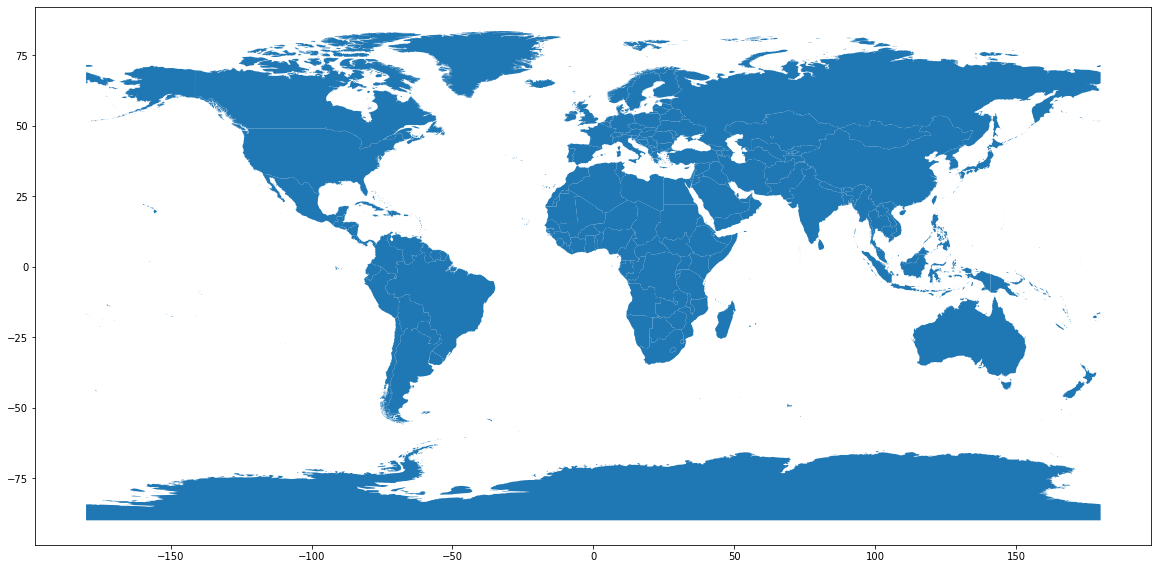

In [11]:
world.plot(figsize=(20,10))

In [242]:
mirror_world = world.copy()
mirror_world.geometry = mirror_world.geometry.scale(yfact=-1, origin=(0,0,0)).translate(xoff=-180)
mirror_world.crs = {'init': 'epsg:4326'}
l_world = gpd.GeoDataFrame([{'geometry':Polygon([(-180, -90),(0,-90),(0,90),(-180, 90)])}], crs={'init': 'epsg:4326'}, geometry='geometry')
l_mirror_world = gpd.overlay(mirror_world, l_world, how='difference')
r_mirror_world = gpd.overlay(mirror_world, l_world, how='intersection')
l_shift_mirror_world = l_mirror_world.copy()
l_shift_mirror_world.geometry = l_shift_mirror_world.geometry.translate(xoff=360)
combo_mirror_world = pd.concat([r_mirror_world, l_shift_mirror_world])
combo_mirror_world.crs = {'init': 'epsg:4326'}
antipode_space = gpd.overlay(world, combo_mirror_world, how='intersection')

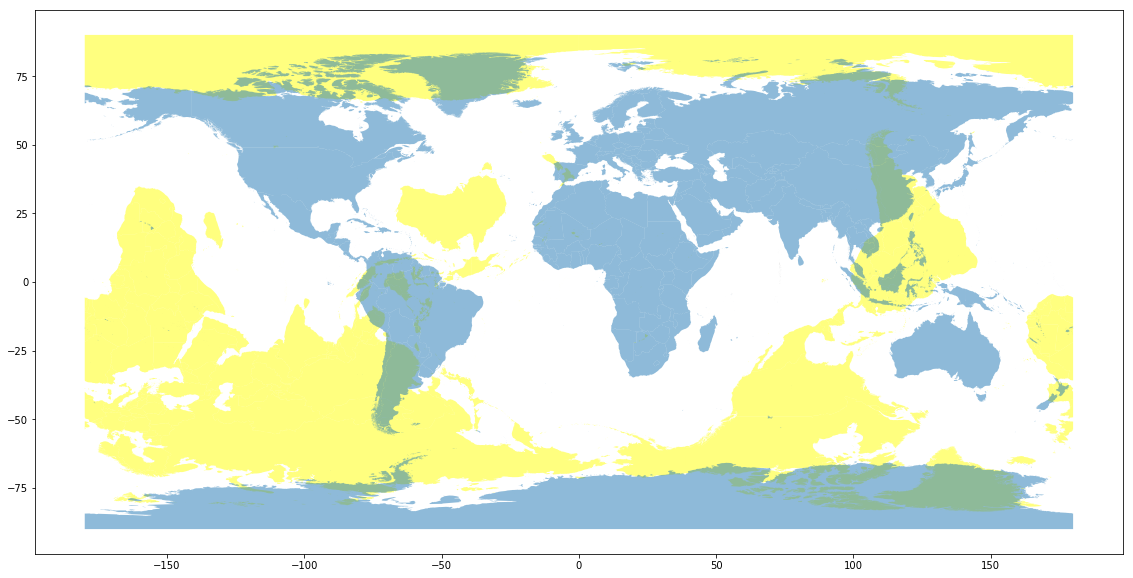

In [243]:
# just a test plot
fig, ax = plt.subplots(figsize=(20,10), )
combo_mirror_world.cx[-180:180,:].plot(color='yellow', alpha=0.5, ax=ax)
world.cx[-180:180,:].plot(ax=ax, alpha=0.5)

In [244]:
antipode_space['area'] = antipode_space.area
print(f'{100*antipode_space.area.sum()/world.geometry.area.sum()}')

16.1822300572976


In [249]:
antipode_space['NAME_EN_2'].head()

0       France
1       France
2    Venezuela
3       Guyana
4     Colombia
Name: NAME_EN_2, dtype: object

In [ ]:
# Plot to leaflet
m = folium.Map(location=[32, -87], zoom_start=2,
               tiles="OpenStreetMap")
folium.GeoJson(
    data=antipode_space,
    tooltip=folium.features.GeoJsonTooltip(
            fields=['NAME_EN_2'],
            aliases=['Country:'],                              
        ),
    name='Antipode Areas').add_to(m)
m.add_child(folium.LayerControl())
m.save('antipode_map.html')